<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(3_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,76.814726,66.656340,79.752197,47.363087,289.141412,569.727762,629.782061,-60.054299
1,0.0,1.0,53.557646,92.321477,70.835209,26.780814,1045.751899,1299.247045,1133.230560,166.016486
2,0.0,2.0,67.175628,26.898534,25.810654,99.541895,89.880648,319.307359,62.038067,257.269292
3,0.0,3.0,39.455210,61.521298,46.194403,70.153238,-970.500101,-743.175952,566.699924,-1309.875876
4,0.0,4.0,30.209881,36.766858,49.433794,39.455255,-12.400695,153.465093,84.662139,68.802954
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,94.058735,98.308082,43.821292,95.893276,1540.377095,1882.458480,997.337958,885.120522
29996,999.0,26.0,32.345976,25.982218,99.017340,35.729253,-97.977340,105.097447,-232.635114,337.732561
29997,999.0,27.0,72.781566,75.286352,34.742846,25.369325,1091.088362,1309.268452,790.809411,518.459040
29998,999.0,28.0,75.592007,35.419429,21.020937,71.618700,-395.510210,-181.859137,532.902377,-714.761514


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    76.814726  66.656340  79.752197  47.363087   289.141412   
      1.0    53.557646  92.321477  70.835209  26.780814  1045.751899   
      2.0    67.175628  26.898534  25.810654  99.541895    89.880648   
      3.0    39.455210  61.521298  46.194403  70.153238  -970.500101   
      4.0    30.209881  36.766858  49.433794  39.455255   -12.400695   
...                ...        ...        ...        ...          ...   
999.0 25.0   94.058735  98.308082  43.821292  95.893276  1540.377095   
      26.0   32.345976  25.982218  99.017340  35.729253   -97.977340   
      27.0   72.781566  75.286352  34.742846  25.369325  1091.088362   
      28.0   75.592007  35.419429  21.020937  71.618700  -395.510210   
      29.0   71.738854  27.322217  64.708433  76.067720  -142.508485   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     569.727762   629.782061   -60.054299  
      1.0    1299.247045  1133.230560   166.016486  
      2.0     319.307359    62.038067   257.269292  
      3.0    -743.175952   566.699924 -1309.875876  
      4.0     153.465093    84.662139    68.802954  
...                  ...          ...          ...  
999.0 25.0   1882.458480   997.337958   885.120522  
      26.0    105.097447  -232.635114   337.732561  
      27.0   1309.268452   790.809411   518.459040  
      28.0   -181.859137   532.902377  -714.761514  
      29.0    107.328739   141.167548   -33.838808  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    76.814726  66.656340  79.752197  47.363087   289.141412   
      1.0    53.557646  92.321477  70.835209  26.780814  1045.751899   
      2.0    67.175628  26.898534  25.810654  99.541895    89.880648   
      3.0    39.455210  61.521298  46.194403  70.153238  -970.500101   
      4.0    30.209881  36.766858  49.433794  39.455255   -12.400695   
...                ...        ...        ...        ...          ...   
999.0 25.0   94.058735  98.308082  43.821292  95.893276  1540.377095   
      26.0   32.345976  25.982218  99.017340  35.729253   -97.977340   
      27.0   72.781566  75.286352  34.742846  25.369325  1091.088362   
      28.0   75.592007  35.419429  21.020937  71.618700  -395.510210   
      29.0   71.738854  27.322217  64.708433  76.067720  -142.508485   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     569.727762   629.782061   -60.054299  
      1.0    1299.247045  1133.230560   166.016486  
      2.0     319.307359    62.038067   257.269292  
      3.0    -743.175952   566.699924 -1309.875876  
      4.0     153.465093    84.662139    68.802954  
...                  ...          ...          ...  
999.0 25.0   1882.458480   997.337958   885.120522  
      26.0    105.097447  -232.635114   337.732561  
      27.0   1309.268452   790.809411   518.459040  
      28.0   -181.859137   532.902377  -714.761514  
      29.0    107.328739   141.167548   -33.838808  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,76.814726,66.656340,79.752197,47.363087,289.141412,569.727762,629.782061,-60.054299
1,0.0,1.0,53.557646,92.321477,70.835209,26.780814,1045.751899,1299.247045,1133.230560,166.016486
2,0.0,2.0,67.175628,26.898534,25.810654,99.541895,89.880648,319.307359,62.038067,257.269292
3,0.0,3.0,39.455210,61.521298,46.194403,70.153238,-970.500101,-743.175952,566.699924,-1309.875876
4,0.0,4.0,30.209881,36.766858,49.433794,39.455255,-12.400695,153.465093,84.662139,68.802954
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,94.058735,98.308082,43.821292,95.893276,1540.377095,1882.458480,997.337958,885.120522
29996,999.0,26.0,32.345976,25.982218,99.017340,35.729253,-97.977340,105.097447,-232.635114,337.732561
29997,999.0,27.0,72.781566,75.286352,34.742846,25.369325,1091.088362,1309.268452,790.809411,518.459040
29998,999.0,28.0,75.592007,35.419429,21.020937,71.618700,-395.510210,-181.859137,532.902377,-714.761514


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    76.814726  66.656340  79.752197  47.363087   289.141412   
      1.0    53.557646  92.321477  70.835209  26.780814  1045.751899   
      2.0    67.175628  26.898534  25.810654  99.541895    89.880648   
      3.0    39.455210  61.521298  46.194403  70.153238  -970.500101   
      4.0    30.209881  36.766858  49.433794  39.455255   -12.400695   
...                ...        ...        ...        ...          ...   
999.0 25.0   94.058735  98.308082  43.821292  95.893276  1540.377095   
      26.0   32.345976  25.982218  99.017340  35.729253   -97.977340   
      27.0   72.781566  75.286352  34.742846  25.369325  1091.088362   
      28.0   75.592007  35.419429  21.020937  71.618700  -395.510210   
      29.0   71.738854  27.322217  64.708433  76.067720  -142.508485   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     569.727762   629.782061   -60.054299  
      1.0    1299.247045  1133.230560   166.016486  
      2.0     319.307359    62.038067   257.269292  
      3.0    -743.175952   566.699924 -1309.875876  
      4.0     153.465093    84.662139    68.802954  
...                  ...          ...          ...  
999.0 25.0   1882.458480   997.337958   885.120522  
      26.0    105.097447  -232.635114   337.732561  
      27.0   1309.268452   790.809411   518.459040  
      28.0   -181.859137   532.902377  -714.761514  
      29.0    107.328739   141.167548   -33.838808  

[30000 rows x 8 columns]

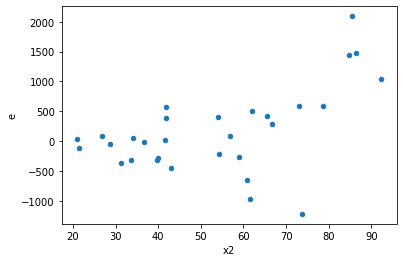

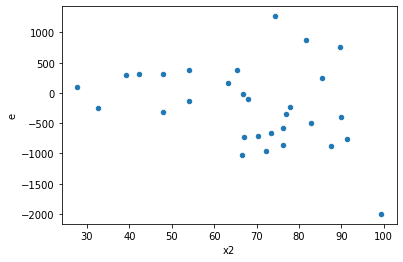

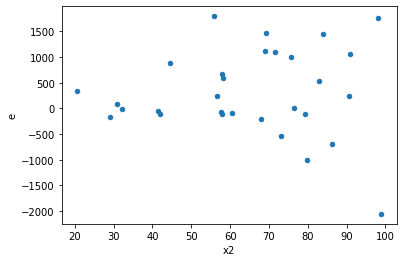

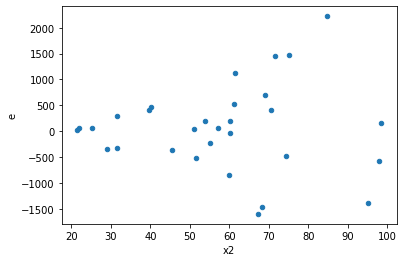

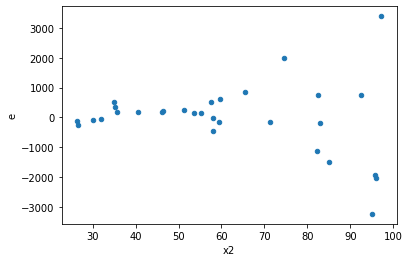

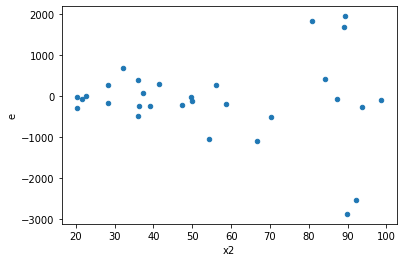

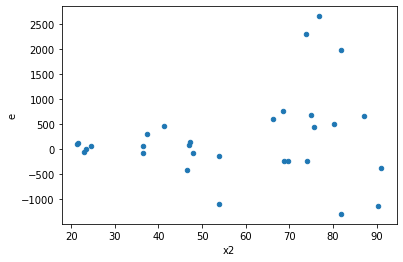

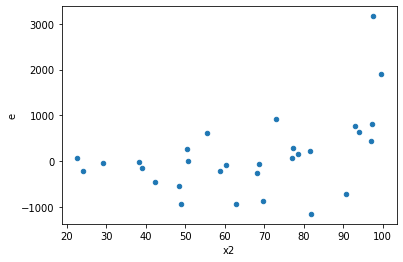

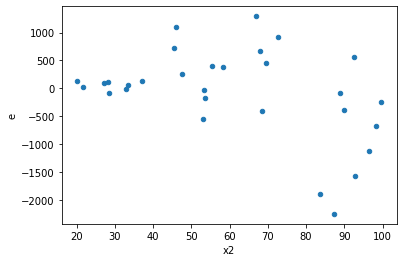

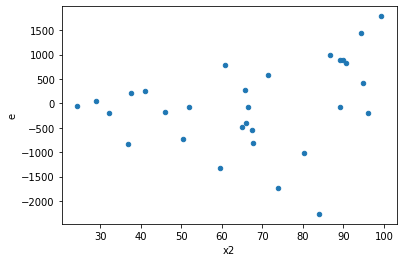

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,10.0,12.0,2205425.3129163315,9375287.363567851,220542.53129163315,781273.9469639877,3.542509203954291,0.041868124610821233,0.9790659376945894,0.020934062305410617,Reject001=1 : Homoscedasticity
6.0,11.0,11.0,2227723.6301183333,14410154.546743203,202520.33001075758,1310014.0497039275,6.468555772323408,0.004428945014514962,0.9977855274927425,0.002214472507257481,Reject001=0 : Heteroscedasticity
13.0,11.0,11.0,2296762.061263624,11272748.941406284,208796.55102396582,1024795.3583096621,4.908104819183701,0.01380511796981776,0.9930974410150911,0.00690255898490888,Reject001=1 : Homoscedasticity
14.0,17.0,5.0,11790048.420358019,3830751.6987728816,693532.2600210599,766150.3397545763,1.1047075729848692,0.9992773878014951,0.5003613060992524,0.49963869390074755,Reject001=1 : Homoscedasticity
15.0,15.0,7.0,6508614.619455374,16925040.76847952,433907.6412970249,2417862.9669256457,5.5722986571479485,0.02869942473726339,0.9856502876313683,0.014349712368631695,Reject001=1 : Homoscedasticity
16.0,11.0,11.0,6211229.885221274,7747578.493718462,564657.2622928431,704325.3176107693,1.2473501443172645,0.7203863330315008,0.6398068334842496,0.3601931665157504,Reject001=1 : Homoscedasticity
17.0,8.0,14.0,539774.1805087564,6107741.13016466,67471.77256359455,436267.22358318995,6.465922073886417,0.0025778210943878666,0.9987110894528061,0.0012889105471939333,Reject001=0 : Heteroscedasticity
18.0,17.0,5.0,7848550.103169647,18257932.134528738,461679.41783350863,3651586.4269057475,7.909355032635626,0.031223861146629783,0.9843880694266851,0.015611930573314892,Reject001=1 : Homoscedasticity
19.0,8.0,14.0,8031530.908191285,13883649.820642013,1003941.3635239106,991689.2729030009,0.9877960097411427,0.9692373974146715,0.5153813012926642,0.48461869870733576,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,14.0,8.0,5646889.391798845,2205982.9366001324,403349.24227134604,275747.86707501655,0.6836454322368903,0.5098925068769087,Reject001=1 : Homoscedasticity
1.0,10.0,12.0,4570122.371771725,4283314.608765341,457012.2371771725,356942.88406377845,0.7810357251449274,0.7051238631546201,Reject001=1 : Homoscedasticity
2.0,11.0,11.0,9412305.713212641,4030755.852483207,855664.1557466037,366432.3502257461,0.4282431930387666,0.17527204357032253,Reject001=1 : Homoscedasticity
3.0,10.0,12.0,2205425.3129163315,9375287.363567851,220542.53129163315,781273.9469639877,3.542509203954291,0.041868124610821233,Reject001=1 : Homoscedasticity
4.0,10.0,12.0,14213800.658149082,16709377.124368466,1421380.0658149081,1392448.0936973721,0.9796451541615305,0.9883389484650598,Reject001=1 : Homoscedasticity
5.0,9.0,13.0,11585724.163245613,12274585.105417455,1287302.6848050682,944198.8542628811,0.7334707411146726,0.6520677427478389,Reject001=1 : Homoscedasticity
6.0,11.0,11.0,2227723.6301183333,14410154.546743203,202520.33001075758,1310014.0497039275,6.468555772323408,0.004428945014514962,Reject001=0 : Heteroscedasticity
7.0,10.0,12.0,11388563.838574607,3795572.781335445,1138856.3838574607,316297.73177795374,0.2777327644304109,0.050947766611299,Reject001=1 : Homoscedasticity
8.0,8.0,14.0,8340587.034073211,1102133.93960738,1042573.3792591514,78723.85282909857,0.07550917220334115,0.0010054199274471933,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      734
Reject001=0 : Heteroscedasticity    266
Name: Result_test, dtype: int64